# Лабораторная работа 1. Определение погрешности численного дифференцирования.

*Цель работы:*

Определить зависимость точности численного дифференцирования от шага дифференцирования для первых производных различных порядков.

*Исследуемые формулы численного дифференцирования:*
1. $f'_+(x) = \frac{f(x + h) - f(x)}{h}$

2. $f'_-(x) = \frac{f(x) - f(x - h}{h}$

3. $f'(x) = \frac{f(x + h) - f(x - h)}{2h}$

4. $f'(x) = \frac{4}{3} \frac{f(x + h) - f(x - h)}{2h} - 
            \frac{1}{3} \frac{f(x + 2h) - f(x - 2h)}{4h}$

5. $f'(x) = \frac{3}{2} \frac{f(x + h) - f(x - h)}{2h} - 
            \frac{3}{5} \frac{f(x + 2h) - f(x - 2h)}{4h} + 
            \frac{1}{10} \frac{f(x + 3h) - f(x - 3h)}{6h}$

Первые производные вычислялись для следующих функций в точке $x=e \approx 2,71...$:
1. $f_1(x) = \sin(x^2)\\$
   $f'_1(x) = \cos(x^2)\cdot 2x\\$

2. $f_2(x) = \cos(\sin(x))\\$
   $f'_2(x) = -\sin(\sin(x)) \cdot \cos(x)\\$

3. $f_3(x) = \exp(\sin(\cos(x)))\\$
   $f'_3(x) = -\exp(\sin(\cos(x))) \cdot \cos(\cos(x)) \cdot \sin(x)\\$

4. $f_4(x) = \ln(x+3)\\$
   $f'_4(x) = \frac{1}{x+3}\\$

5. $f_5(x) = \sqrt{x+3}\\$
   $f'_5(x) = \frac{1}{2\sqrt{x+3}}\\$

Шаг дифференцирования брался равным $h_n = \frac{2}{2^n}, n= \overline{1, 39}$

In [2]:
import sys
import numpy
import os
import math
import matplotlib.pyplot as plt

thisDirPath = os.path.abspath("")
# Предполагаем, что собранная библиотека MasFoam расположена в папке:
# <project-root-dir>/build
sys.path.append(os.path.join(thisDirPath, "../build"))
import MasFoam

In [22]:
def CalcResidual(derivFormula, funct, x_0, h, analytical):
    return numpy.abs(numpy.array([derivFormula(funct, x_0, step) for step in h]) - analytical)

def BuildResidualPlotLog(funct, x_0, h, analytical):
    plt.plot(numpy.log10(h),
             numpy.log10(CalcResidual(MasFoam.DerivateLeftO1, funct, x_0, h, analytical)),
             c='k', label="$f_1'(x)$")
    plt.plot(numpy.log10(h),
             numpy.log10(CalcResidual(MasFoam.DerivateRightO1, funct, x_0, h, analytical)),
             c='b', label="$f_2'(x)$")
    plt.plot(numpy.log10(h),
             numpy.log10(CalcResidual(MasFoam.DerivateCentralO2, funct, x_0, h, analytical)),
             c='orange', label="$f_3'(x)$")
    plt.plot(numpy.log10(h),
             numpy.log10(CalcResidual(MasFoam.DerivateCentralO4, funct, x_0, h, analytical)),
             c='green', label="$f_4'(x)$")
    plt.plot(numpy.log10(h),
             numpy.log10(CalcResidual(MasFoam.DerivateCentralO6, funct, x_0, h, analytical)),
             c='c', label="$f_5'(x)$")
    plt.xlabel("Шаг численного дифференцирования в лог. масштабе $\log h$")
    plt.ylabel("Погрешность дифференцирования, лог. масштаб.")
    plt.legend()
    plt.show()


def BuildResidualPlot(funct, x_0, h, analytical):
    plt.plot(h,
             CalcResidual(MasFoam.DerivateLeftO1, funct, x_0, h, analytical),
             c='k', label="$f_1'(x)$")
    plt.plot(h,
             CalcResidual(MasFoam.DerivateRightO1, funct, x_0, h, analytical),
             c='b', label="$f_2'(x)$")
    plt.plot(h,
             CalcResidual(MasFoam.DerivateCentralO2, funct, x_0, h, analytical),
             c='orange', label="$f_3'(x)$")
    plt.plot(h,
             CalcResidual(MasFoam.DerivateCentralO4, funct, x_0, h, analytical),
             c='green', label="$f_4'(x)$")
    plt.plot(h,
             CalcResidual(MasFoam.DerivateCentralO6, funct, x_0, h, analytical),
             c='c', label="$f_5'(x)$")
    plt.xlabel("Шаг численного дифференцирования $h$")
    plt.ylabel("Погрешность дифференцирования")
    plt.legend()
    plt.show()

### Проверка производных для функции $x^4$ (~unit-test).

Проверим, что функции вычисления производных реализованы правильно. Для этого посчитаем производные функции $x^4$ в точках на отрезке [0; 10] (шаг дифференцирования для методов разного порядка берётся разным). По построенным графикам погрешностей видно, что функции вычисления производных реализованы правильно.

/tmp/ipykernel_19696/1473393664.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x, numpy.log10(numpy.abs(numpy.array([MasFoam.DerivateCentralO6(x4, _x, 1e-3) for _x in x]) - prec_deriv)),


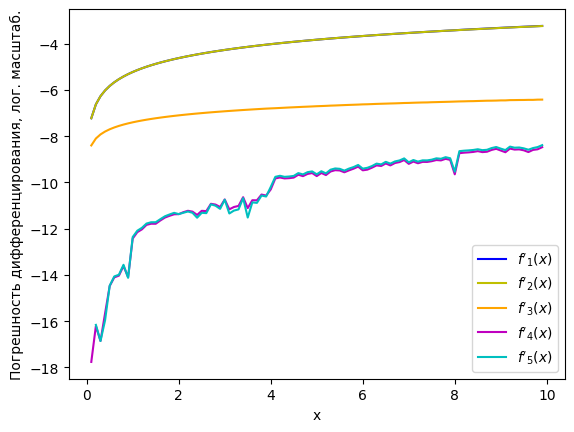

In [23]:
def x4(x):
    return x**4

x = numpy.arange(0.1, 10, 0.1)

prec_deriv = 4 * x**3

plt.plot(x, numpy.log10(numpy.abs(numpy.array([MasFoam.DerivateLeftO1(x4, _x, 1e-6) for _x in x]) - prec_deriv)), 
         c='b', label="$f'_1(x)$")
plt.plot(x, numpy.log10(numpy.abs(numpy.array([MasFoam.DerivateRightO1(x4, _x, 1e-6) for _x in x]) - prec_deriv)), 
         c='y', label="$f'_2(x)$")
plt.plot(x, numpy.log10(numpy.abs(numpy.array([MasFoam.DerivateCentralO2(x4, _x, 1e-4) for _x in x]) - prec_deriv)), 
         c='orange', label="$f'_3(x)$")
plt.plot(x, numpy.log10(numpy.abs(numpy.array([MasFoam.DerivateCentralO4(x4, _x, 1e-3) for _x in x]) - prec_deriv)),
        c='m', label="$f'_4(x)$")
plt.plot(x, numpy.log10(numpy.abs(numpy.array([MasFoam.DerivateCentralO6(x4, _x, 1e-3) for _x in x]) - prec_deriv)), 
         c='c', label="$f'_5(x)$")

plt.xlabel("x")
plt.ylabel("Погрешность дифференцирования, лог. масштаб.")
plt.legend()
plt.show()

In [24]:
h = numpy.array([2 / 2**n for n in range(1, 40)])

#### $f_1(x) = \sin(x^2)$

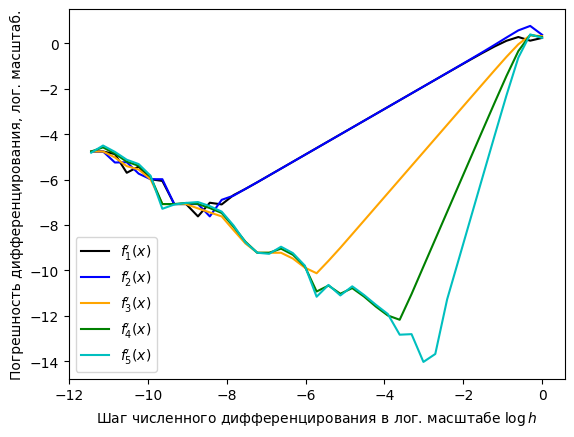

In [25]:
def f1(x):
    return math.sin(x**2)

def df1(x):
    return math.cos(x**2) * 2 * x

x0 = math.e
BuildResidualPlotLog(f1, x0, h, df1(x0))

#### $f_2(x) = \cos(\sin(x))$

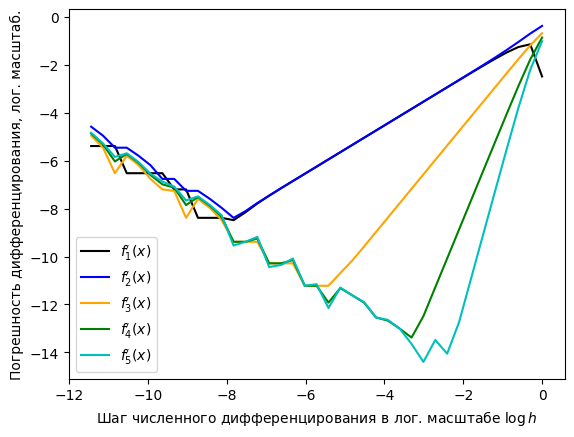

In [26]:
def f2(x):
    return math.cos(math.sin(x))

def df2(x):
    return -math.sin(math.sin(x)) * math.cos(x)

x0 = math.e
BuildResidualPlotLog(f2, x0, h, df2(x0))

#### $f_3(x) = \exp(\sin(\cos(x)))$

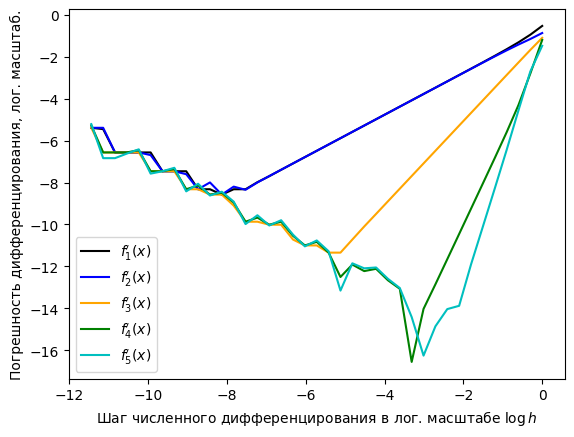

In [27]:
def f3(x):
    return math.exp(math.sin(math.cos(x)))

def df3(x):
    return math.exp(math.sin(math.cos(x))) * math.cos(math.cos(x)) * (-math.sin(x))

x0 = math.e
BuildResidualPlotLog(f3, x0, h, df3(x0))

#### $f_4(x) = \ln(x+3)$

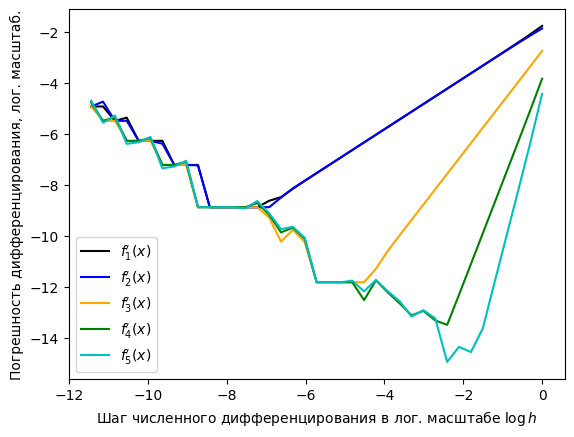

In [28]:
def f4(x):
    return math.log(x + 3)

def df4(x):
    return 1 / (x + 3)

x0 = math.e
BuildResidualPlotLog(f4, x0, h, df4(x0))

#### $f_5(x) = \sqrt{x+3}$

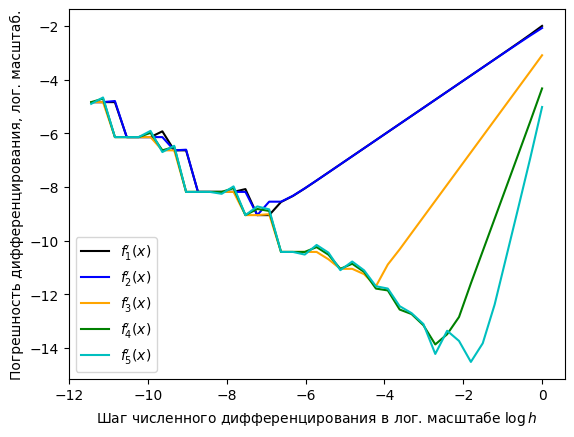

In [29]:
def f5(x):
    return math.sqrt(x + 3)

def df5(x):
    return 1 / (2 * math.sqrt(x + 3))

x0 = math.e
BuildResidualPlotLog(f5, x0, h, df5(x0))

## Выводы:

1. Брать слишком маленький шаг дифференцирования бессмысленно, так с уменьшением шага дифференцирования погрешность сначала убывает, а потом начинает увеличиваться из-за ошибок машинного округления малых чисел.

2. Чем выше порядок метода, тем быстрее убывает погрешность вычисления при уменьшении шага численного дифференцирования. Также формулы численного дифференцирования более высокого порядка позволяют достичь большей точности. Но при этом возрастает вычислительная сложность.

3. Увеличение точности между формулами 4 и 6 порядков незначительное по сравнению с приростом точности между формулами (1 и 2), (2 и 4) порядков. То есть, если необходима максимальная точность, использовать формулы выше 4 порядка не имеет большого смысла.